<a href="https://colab.research.google.com/github/shyakx/linear_regression_model_23/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Load the Synthetic Dataset (or replace with your real dataset)
df = pd.read_csv('/content/financial_inclusion_dataset.csv')  # Loading the dataset
df.head()

,Credit_Score,Loan_Amount,Business_Type,Years_in_Operation,Annual_Revenue_Growth_Rate
0,402,64792.870623,Manufacturing,14,20.645872
1,735,71096.125454,Retail,14,27.430093
2,570,48181.401153,Manufacturing,2,20.683676
3,406,64618.017608,Manufacturing,23,11.505903
4,371,60509.859633,Agriculture,5,13.188084


In [13]:
df.shape

(500, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_Score                500 non-null    int64  
 1   Loan_Amount                 500 non-null    float64
 2   Business_Type               500 non-null    object 
 3   Years_in_Operation          500 non-null    int64  
 4   Annual_Revenue_Growth_Rate  500 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 19.7+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Business_Type'] = label_encoder.fit_transform(df['Business_Type'])

In [15]:
df.head()

,Credit_Score,Loan_Amount,Business_Type,Years_in_Operation,Annual_Revenue_Growth_Rate
0,402,64792.870623,1,14,20.645872
1,735,71096.125454,2,14,27.430093
2,570,48181.401153,1,2,20.683676
3,406,64618.017608,1,23,11.505903
4,371,60509.859633,0,5,13.188084


In [16]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Annual_Revenue_Growth_Rate'], axis=1)
y = df['Annual_Revenue_Growth_Rate']

scale = StandardScaler()

X_scale= scale.fit_transform(X)
joblib.dump(scale, "scale.pkl")
print("saved scale.pkl")

saved scale.pkl


In [22]:
# Convert X_scale to a DataFrame, assuming you have column names (for example, X.columns)
X_scale = pd.DataFrame(X_scale, columns=X.columns)

# Now you can use .head()
X_scale.head()

,Credit_Score,Loan_Amount,Business_Type,Years_in_Operation
0,-1.048040,0.508517,-0.689854,-0.057604
1,1.061852,0.740752,0.021336,-0.057604
2,0.016410,-0.103510,-0.689854,-1.497717
3,-1.022696,0.502074,-0.689854,1.022480
4,-1.244456,0.350715,-1.401044,-1.137689


Decission tree

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [24]:
decision = DecisionTreeRegressor(random_state=42)
decision.fit(X_train, y_train)
prediction = decision.predict(X_test)

In [26]:
# R² score
r2 = r2_score(y_test, prediction )
print("(R²): ", r2)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, prediction )
print("(MSE): ", mse)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print("(RMSE): ", rmse)

(R²):  -0.40331760885906576
(MSE):  54.2156663141913
(RMSE):  7.363128839983129


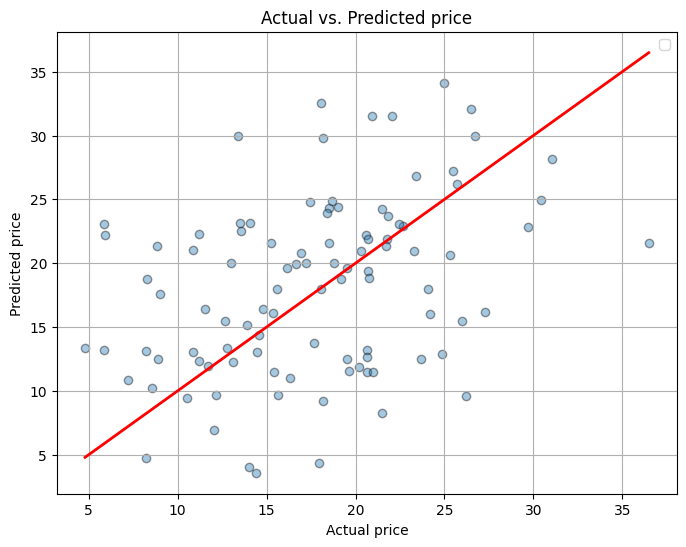

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, alpha=0.4, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs. Predicted price')
plt.legend()
plt.grid(True)
plt.show()

Linear regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [30]:
linear = LinearRegression()
linear.fit(X_train, y_train)
prediction = linear.predict(X_test)

In [31]:
# R² score
r2 = r2_score(y_test, prediction )
print("(R²): ", r2)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, prediction )
print("(MSE): ", mse)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print("(RMSE): ", rmse)

(R²):  0.3775974286316457
(MSE):  24.04585384618388
(RMSE):  4.903657190932486


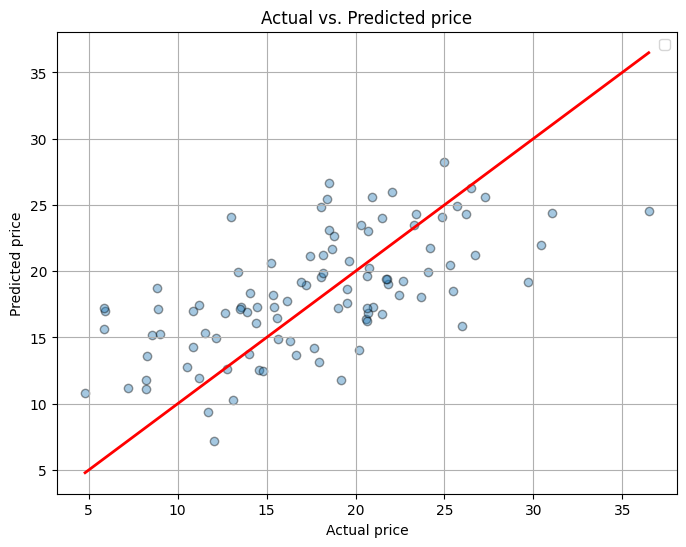

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, alpha=0.4, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs. Predicted price')
plt.legend()
plt.grid(True)
plt.show()

Random

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [34]:
random= RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
random.fit(X_train, y_train)
prediction = random.predict(X_test)

In [35]:
# R² score
r2 = r2_score(y_test, prediction )
print("(R²): ", r2)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, prediction )
print("(MSE): ", mse)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print("(RMSE): ", rmse)

(R²):  0.3197287849486903
(MSE):  26.28154664741704
(RMSE):  5.126553096127752


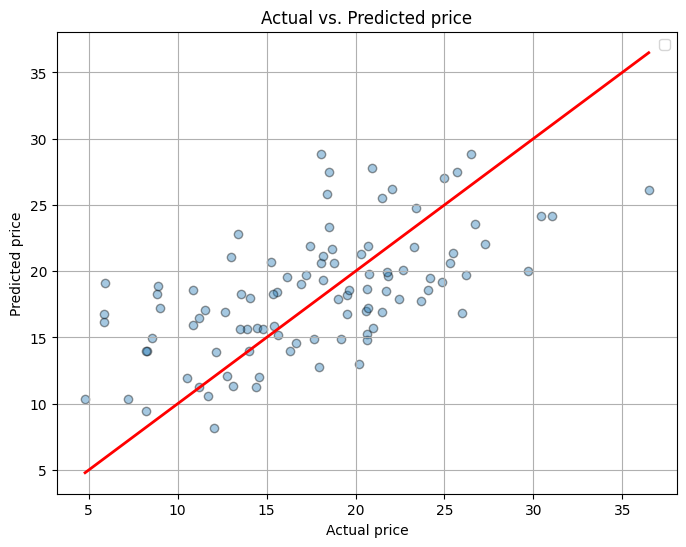

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, alpha=0.4, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs. Predicted price')
plt.legend()
plt.grid(True)
plt.show()